### 선형회귀(Linear Regression) - 경사하강법

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### H(x) = aX + b 에서처럼, F = C*1.8 +32 
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.


### Configuration (or prerequisite)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

#### 선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

In [2]:
C=np.random.randint(0,100, size=100)
C

C=np.random.randint(low=0,high=100, size=100) 
C

array([76, 80, 41,  7, 82, 54, 26,  8, 80, 84, 39,  7, 94, 93, 18, 18, 47,
       99, 46, 70, 43, 69, 70, 10, 71, 20, 80, 87, 56, 68,  3, 71, 88, 92,
       52, 75, 28, 12, 38, 59, 93, 28, 40, 72, 36, 34, 90, 56, 15, 79, 36,
       24, 85, 83, 22, 48, 39, 44, 97, 19, 70, 70, 77, 90,  9,  1, 92, 53,
       26, 79, 40, 46, 51, 20, 93,  5, 91,  0, 16, 12, 51, 26,  6, 25, 12,
       60, 16, 26, 36, 79, 97, 25, 73, 48, 32, 68, 70, 29, 80, 20])

In [3]:
C.shape

(100,)

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### 우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성. 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.

**화씨온도 = 섭씨온도 * 1.8  + 32**

In [4]:
F = C * 1.8 + 32
F

array([168.8, 176. , 105.8,  44.6, 179.6, 129.2,  78.8,  46.4, 176. ,
       183.2, 102.2,  44.6, 201.2, 199.4,  64.4,  64.4, 116.6, 210.2,
       114.8, 158. , 109.4, 156.2, 158. ,  50. , 159.8,  68. , 176. ,
       188.6, 132.8, 154.4,  37.4, 159.8, 190.4, 197.6, 125.6, 167. ,
        82.4,  53.6, 100.4, 138.2, 199.4,  82.4, 104. , 161.6,  96.8,
        93.2, 194. , 132.8,  59. , 174.2,  96.8,  75.2, 185. , 181.4,
        71.6, 118.4, 102.2, 111.2, 206.6,  66.2, 158. , 158. , 170.6,
       194. ,  48.2,  33.8, 197.6, 127.4,  78.8, 174.2, 104. , 114.8,
       123.8,  68. , 199.4,  41. , 195.8,  32. ,  60.8,  53.6, 123.8,
        78.8,  42.8,  77. ,  53.6, 140. ,  60.8,  78.8,  96.8, 174.2,
       206.6,  77. , 163.4, 118.4,  89.6, 154.4, 158. ,  84.2, 176. ,
        68. ])

In [7]:
print(F.shape)
F[:10]

(100,)


array([168.8, 176. , 105.8,  44.6, 179.6, 129.2,  78.8,  46.4, 176. ,
       183.2])

### Visualize

#### 위에서 우리가 만든 Feature와 Label을 matplot을 이용해서 시각화

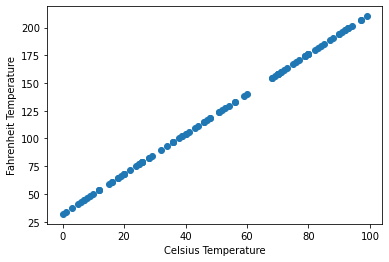

In [8]:
plt.scatter(C, F)
plt.xlabel('Celsius Temperature')
plt.ylabel('Fahrenheit Temperature')
plt.show()

### Bias (편향 찾기) -- Weight는 1.8

#### Weight는 1.8로 주고 Bias를 직관적인 방법으로 한번 찾아보겠다.

In [9]:
X = C
y = F # F가 라벨값이라서  y소문자를 지정

In [11]:
w = 1.8
#b는 랜덤한 값 지정
b = np.random.uniform(low=-1.0, high=+1.0)
w, b

(1.8, 0.9220676676137105)

In [12]:
y_predict = w * X + b
y_predict[:10]

array([137.72206767, 144.92206767,  74.72206767,  13.52206767,
       148.52206767,  98.12206767,  47.72206767,  15.32206767,
       144.92206767, 152.12206767])

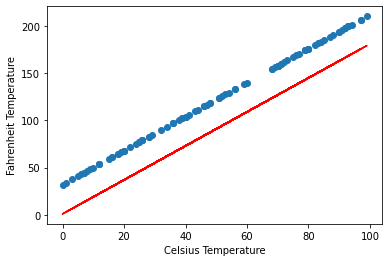

In [13]:
plt.scatter(C, F)
plt.xlabel('Celsius Temperature')
plt.ylabel('Fahrenheit Temperature')

plt.plot(C, y_predict, c='r')
plt.show()

In [15]:
'''
y_predict - y(예상값과 실제값 사이의 오차, 간격)
이 값을 다시 보정해주면 bias를 구할 수 있다.
'''
b = b-(y_predict-y).mean()
b

32.000000000000014

In [16]:
y_predict = w * X + b

In [17]:
y_predict[:10]

array([168.8, 176. , 105.8,  44.6, 179.6, 129.2,  78.8,  46.4, 176. ,
       183.2])

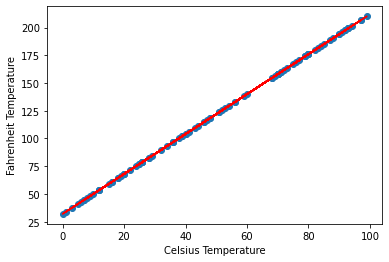

In [18]:
plt.scatter(C, F)
plt.xlabel('Celsius Temperature')
plt.ylabel('Fahrenheit Temperature')

plt.plot(C, y_predict, c='r')
plt.show()

#### 정규분포에 해당하는 w,b값을 랜덤하게 지정해서 초기화
실제값과 예측치 결과값과의 차이를 시각화해서 확인

In [19]:
w = np.random.uniform(low=-1.0, high= 1.0) 
b = np.random.uniform(low=-1.0, high= 1.0)
w,b

(0.9368089818525585, 0.5801078628013538)

In [20]:
y_predict = w * X + b
y_predict[0:10]

array([71.77759048, 75.52482641, 38.98927612,  7.13777074, 77.39844437,
       51.16779288, 24.93714139,  8.07457972, 75.52482641, 79.27206234])

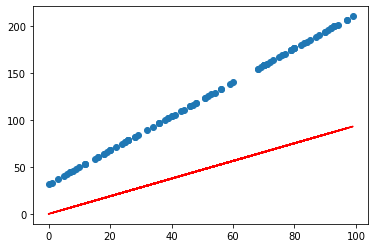

In [21]:
plt.scatter(C, F)
plt.plot(C, y_predict, 'r')

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
#### 이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 break 키워드를 사용해서 학습을 종료한다.

In [28]:
num_epoch = 100000 #학습을 몇번 반복할지를 지정...epoch
learning_rate = 0.0003 #가장 중요한 보폭을 결정하는 값. 0.0004~0.01

w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):    
   
    y_predict = w * X + b 
  
    error = np.abs(y_predict - y).mean()
    
    if error < 0.1:
        break
    
    w = w - learning_rate * ((y_predict-y) * X).mean()
    b = b - learning_rate * (y_predict-y).mean()
    
    if epoch % 10000 == 0:
        print(f"{epoch:5} w = {w:.6f}, b = {b:.3f}, error = {error:.3f}")
    
print("---------" * 10)
print(f"{epoch:5} w = {w:.3f}, b = {b:.3f}, error = {error:.3f}")

    0 w = 2.296153, b = 0.920, error = 148.073
10000 w = 2.017028, b = 17.424, error = 6.156
20000 w = 1.901779, b = 25.164, error = 2.887
30000 w = 1.847731, b = 28.794, error = 1.354
40000 w = 1.822384, b = 30.497, error = 0.635
50000 w = 1.810497, b = 31.295, error = 0.298
60000 w = 1.804923, b = 31.669, error = 0.140
------------------------------------------------------------------------------------------
64410 w = 1.804, b = 31.763, error = 0.100


### Predict

#### 선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보자.

In [29]:
y_predict = w * C + b

y_predict[0:5]

array([168.83116079, 176.04526304, 105.70776606,  44.3878969 ,
       179.65231417])

In [30]:
result = pd.DataFrame({"C": C, "F": F, "F(predict)": y_predict})
print(result.shape) 
result.head(10)

(100, 3)


,C,F,F(predict)
0,76,168.8,168.831161
1,80,176.0,176.045263
2,41,105.8,105.707766
3,7,44.6,44.387897
4,82,179.6,179.652314
5,54,129.2,129.153598
6,26,78.8,78.654883
7,8,46.4,46.191422
8,80,176.0,176.045263
9,84,183.2,183.259365


### Visualize
#### 결과가 잘 나왔으면, 예측한 값과 실제값을 비교하여 시각화를 통해 잘 예측이 되었는지 확인

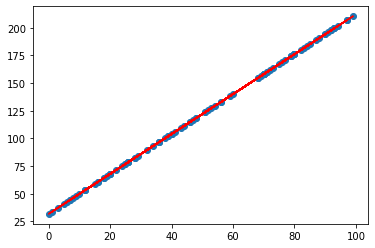

In [31]:
plt.scatter(C, F)
plt.plot(C, y_predict, 'r')